In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as sql
from sklearn.preprocessing import LabelEncoder

#### importing data from kaggle

In [2]:
credits = pd.read_csv('data/credits.csv')
titles = pd.read_csv('data/titles.csv')

## we are trying to predict IMDB scores of netflix shows with given data

In [3]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77213 entries, 0 to 77212
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77213 non-null  int64 
 1   id         77213 non-null  object
 2   name       77213 non-null  object
 3   character  67586 non-null  object
 4   role       77213 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


In [4]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

<font size="3">
<br>as we have two seperate datasets we will combine them into one dataset so that each actor becomes a row value a
long with other attributes related to in which movie he or she worked in and what imdb scores that movie had
 
<br>essentially we are emphasising the actor here
(note that for this format to work we will drop the name column later on so that names of the movie does not interfere with the algorythm

</font>

In [5]:
titles['id'].head()

0    ts300399
1     tm84618
2    tm127384
3     tm70993
4    tm190788
Name: id, dtype: object

In [6]:
credits['id'].head()

0    tm84618
1    tm84618
2    tm84618
3    tm84618
4    tm84618
Name: id, dtype: object

In [7]:
n=0
titles_column = ''
for i in titles.columns:
    if i != 'id' and n ==0:
            
        titles_column = 'titles.'+i
        
    elif i != 'id' and n >0:
        titles_column = titles_column+',titles.'+i
    
    if i != 'id':
        n+=1


credits_column = ''
n = 0

for i in credits.columns:
    if i not in ['person_id'] and n ==0:
            
        credits_column = 'credits.'+i
        
    elif i not in ['person_id'] and n >0:
        credits_column = credits_column+',credits.'+i
    
    if i not in ['person_id']:
        n+=1


In [8]:
lines = f'''

select {credits_column},{titles_column}

from titles cross join credits 
on titles.id = credits.id


'''

data = sql.sqldf(lines)
data.head()

,id,name,character,role,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm84618,Albert Brooks,Tom,ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
1,tm84618,Annie Gagen,Campaign Worker (uncredited),ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm84618,Bill Minkin,Tom's Assistant (uncredited),ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
3,tm84618,Billie Perkins,Iris' Friend (uncredited),ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
4,tm84618,Bob Maroff,Mafioso (uncredited),ACTOR,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77213 entries, 0 to 77212
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    77213 non-null  object 
 1   name                  77213 non-null  object 
 2   character             67586 non-null  object 
 3   role                  77213 non-null  object 
 4   title                 77212 non-null  object 
 5   type                  77213 non-null  object 
 6   description           77160 non-null  object 
 7   release_year          77213 non-null  int64  
 8   age_certification     46595 non-null  object 
 9   runtime               77213 non-null  int64  
 10  genres                77213 non-null  object 
 11  production_countries  77213 non-null  object 
 12  seasons               13976 non-null  float64
 13  imdb_id               73388 non-null  object 
 14  imdb_score            72937 non-null  float64
 15  imdb_votes         

In [10]:
def list_splitter(data):
    genres_list = []

    for i in data.unique():

        i = i.replace('[','').replace(']','').replace(' ','').split(',')

        if len(i) >1:
            for types in i:
                types = types.replace('[','').replace(']','').replace('"','').replace(' ','')
                if types not in genres_list:
                    if len(types)>0:
                        genres_list.append(types)


        else:
            for ii in i:
                ii = ii.replace('[','').replace(']','').replace('"','').replace(' ','')
                if ii not in genres_list+["''"]:
                    if len(ii)>0:
                        genres_list.append(ii)
                        
    genres_list = [i.replace("'",'') for i in genres_list]
    return genres_list

In [11]:
genres_list = list_splitter(data['genres'])
genres_list

['crime',
 'drama',
 'comedy',
 'fantasy',
 'horror',
 'european',
 'thriller',
 'action',
 'music',
 'romance',
 'family',
 'western',
 'war',
 'animation',
 'documentation',
 'history',
 'scifi',
 'reality',
 'sport']

In [12]:
production_list = list_splitter(data['production_countries'])
production_list

['US',
 'GB',
 'JP',
 'EG',
 'DE',
 'IN',
 'DZ',
 'LB',
 'FR',
 'CA',
 'SU',
 'IT',
 'HK',
 'AR',
 'KW',
 'PE',
 'BR',
 'IE',
 'GH',
 'BF',
 'ES',
 'MX',
 'AU',
 'CO',
 'BE',
 'NO',
 'PS',
 'TR',
 'BS',
 'CZ',
 'IS',
 'DK',
 'NZ',
 'CN',
 'KR',
 'BG',
 'RU',
 'SG',
 'MA',
 'UY',
 'TW',
 'MY',
 'CH',
 'CL',
 'NG',
 'SA',
 'AT',
 'NL',
 'SE',
 'PH',
 'Lebanon',
 'TH',
 'XX',
 'AE',
 'HU',
 'ZA',
 'ID',
 'IL',
 'FI',
 'RO',
 'CD',
 'PL',
 'VE',
 'UA',
 'IR',
 'JO',
 'QA',
 'LU',
 'SK',
 'HR',
 'SY',
 'GL',
 'PT',
 'PK',
 'VN',
 'PR',
 'IQ',
 'KH',
 'GE',
 'CU',
 'KE',
 'VA',
 'RS',
 'AL',
 'TZ',
 'TN',
 'ZW',
 'PY',
 'NP',
 'GR',
 'CM',
 'BD',
 'KG',
 'LT',
 'CY',
 'SN',
 'MW',
 'IO',
 'MU',
 'LK',
 'AO',
 'GT',
 'MZ',
 'AF',
 'NA',
 'FO']

In [13]:
def fill_data(data,list_,id_):
    
    time = [i for i in range(1000,len(data),1000)]
    
    final_table = pd.DataFrame(columns=[i for i in ['id']+list_])
    
    n=0
    
    final_table['id'] = id_
    
    for i,id_no in zip(data,id_):

#         final_table.loc[n,'id'] = id_[n]
        
        i = i.replace('[','').replace(']','').replace(' ','').split(',')
        i = [ii.replace("'",'') for ii in i]
        
        
        if len(i) >1:
            
            for types in i:
                types = types.replace('[','').replace(']','').replace('"','').replace(' ','')
                
                col = 0
                for column in final_table.columns:
                    if col>0:
                        types.replace("'",'')
                        if column == types:
                            final_table.loc[n,column] = 1
                        else:
                            final_table.loc[n,column] = 0
                    
                    
                    col+=1


        else:
            for ii in i:
                ii = ii.replace('[','').replace(']','').replace('"','').replace(' ','')
                
                col = 0
                for column in final_table.columns:
                    if col>0:
                        ii=ii.replace("'",'')
                        if column == ii:
                            final_table.loc[n,column] = 1
                        else:
                            final_table.loc[n,column] = 0
                    
                    
                    col+=1
        
        n+=1
        
#         if n > 100:
#             break
        
        if n in time:
            print(n)
    
    
    return final_table

In [14]:
# genres_ = fill_data(data['genres'],genres_list,data['id'])
# genres_.head()`

In [15]:
# production_ = fill_data(data['production_countries'],production_list,data['id'])
# production_.head()

In [16]:
# pd.to_pickle(production_,'data/production_pickle')
# pd.to_pickle(genres_,'data/genres_pickle')

In [17]:
production_ = pd.read_pickle('data/production_pickle')
production_.head()

,id,US,GB,JP,EG,DE,IN,DZ,LB,FR,...,MW,IO,MU,LK,AO,GT,MZ,AF,NA,FO
0,tm84618,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tm84618,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tm84618,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tm84618,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tm84618,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
genres_ = pd.read_pickle('data/genres_pickle')
genres_.head()

,id,crime,drama,comedy,fantasy,horror,european,thriller,action,music,romance,family,western,war,animation,documentation,history,scifi,reality,sport
0,tm84618,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tm84618,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,tm84618,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tm84618,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,tm84618,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<font size = "4">
    <br>
    <br>
we have made the country location and genres as new features of the dataset

    
we are dropping some country locations as they have fewer shows made there, if we include them it will only increase the dimentionality with little to no effect on effectiveness of the algorythm
    
</font>

In [19]:
drop_columns = []
for column in [i for i in production_.columns if i!='id']:
    n = 0
    for i in production_[column]:
        if i == 1:
            n+=1
    
    if n<50:
        drop_columns.append(column)
    print(column,'  :  ',n)
    
            

US   :   33453
GB   :   3799
JP   :   3573
EG   :   524
DE   :   1807
IN   :   7202
DZ   :   0
LB   :   193
FR   :   2182
CA   :   1996
SU   :   22
IT   :   1033
HK   :   652
AR   :   582
KW   :   25
PE   :   91
BR   :   855
IE   :   115
GH   :   39
BF   :   0
ES   :   2351
MX   :   890
AU   :   947
CO   :   304
BE   :   484
NO   :   146
PS   :   55
TR   :   1112
BS   :   0
CZ   :   124
IS   :   101
DK   :   251
NZ   :   121
CN   :   971
KR   :   2745
BG   :   82
RU   :   167
SG   :   122
MA   :   9
UY   :   30
TW   :   590
MY   :   188
CH   :   112
CL   :   175
NG   :   597
SA   :   103
AT   :   105
NL   :   290
SE   :   332
PH   :   1351
Lebanon   :   15
TH   :   302
XX   :   171
AE   :   226
HU   :   13
ZA   :   352
ID   :   948
IL   :   90
FI   :   56
RO   :   68
CD   :   5
PL   :   691
VE   :   0
UA   :   9
IR   :   74
JO   :   21
QA   :   30
LU   :   54
SK   :   0
HR   :   12
SY   :   0
GL   :   0
PT   :   42
PK   :   40
VN   :   24
PR   :   7
IQ   :   0
KH   :   15
GE   :   0
CU

In [20]:
len(production_.columns),len(drop_columns)

(107, 53)

In [21]:
production_.drop(columns=drop_columns,inplace=True)

In [22]:
data.drop(columns=['genres','production_countries'],inplace=True)

In [23]:
for i in [data,genres_,production_]:
    i.drop(columns='id',inplace=True)

In [24]:
data = pd.concat([data,genres_,production_],axis=1)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77213 entries, 0 to 77212
Data columns (total 87 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               77213 non-null  object 
 1   character          67586 non-null  object 
 2   role               77213 non-null  object 
 3   title              77212 non-null  object 
 4   type               77213 non-null  object 
 5   description        77160 non-null  object 
 6   release_year       77213 non-null  int64  
 7   age_certification  46595 non-null  object 
 8   runtime            77213 non-null  int64  
 9   seasons            13976 non-null  float64
 10  imdb_id            73388 non-null  object 
 11  imdb_score         72937 non-null  float64
 12  imdb_votes         72850 non-null  float64
 13  tmdb_popularity    77202 non-null  float64
 14  tmdb_score         76093 non-null  float64
 15  crime              77213 non-null  object 
 16  drama              772

In [26]:
data.columns

Index(['name', 'character', 'role', 'title', 'type', 'description',
       'release_year', 'age_certification', 'runtime', 'seasons', 'imdb_id',
       'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score', 'crime',
       'drama', 'comedy', 'fantasy', 'horror', 'european', 'thriller',
       'action', 'music', 'romance', 'family', 'western', 'war', 'animation',
       'documentation', 'history', 'scifi', 'reality', 'sport', 'US', 'GB',
       'JP', 'EG', 'DE', 'IN', 'LB', 'FR', 'CA', 'IT', 'HK', 'AR', 'PE', 'BR',
       'IE', 'ES', 'MX', 'AU', 'CO', 'BE', 'NO', 'PS', 'TR', 'CZ', 'IS', 'DK',
       'NZ', 'CN', 'KR', 'BG', 'RU', 'SG', 'TW', 'MY', 'CH', 'CL', 'NG', 'SA',
       'AT', 'NL', 'SE', 'PH', 'TH', 'XX', 'AE', 'ZA', 'ID', 'IL', 'FI', 'RO',
       'PL', 'IR', 'LU'],
      dtype='object')

In [27]:
data.drop(columns=['character','title','description','imdb_id'],inplace=True)

In [28]:
r = []
for i in data['seasons']:
    if np.isnan(i)==True:
        r.append(0)
    else:
        r.append(i)
        
data['seasons']=r

In [29]:
data.dropna(inplace=True)

In [30]:
data

,name,role,type,release_year,age_certification,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,...,XX,AE,ZA,ID,IL,FI,RO,PL,IR,LU
0,Albert Brooks,ACTOR,MOVIE,1976,R,113,0.0,8.3,795222.0,27.612,...,0,0,0,0,0,0,0,0,0,0
1,Annie Gagen,ACTOR,MOVIE,1976,R,113,0.0,8.3,795222.0,27.612,...,0,0,0,0,0,0,0,0,0,0
2,Bill Minkin,ACTOR,MOVIE,1976,R,113,0.0,8.3,795222.0,27.612,...,0,0,0,0,0,0,0,0,0,0
3,Billie Perkins,ACTOR,MOVIE,1976,R,113,0.0,8.3,795222.0,27.612,...,0,0,0,0,0,0,0,0,0,0
4,Bob Maroff,ACTOR,MOVIE,1976,R,113,0.0,8.3,795222.0,27.612,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76999,Olcay Zuhal Gören,ACTOR,MOVIE,2021,R,96,0.0,6.0,10418.0,7.403,...,0,0,0,0,0,0,0,0,0,0
77000,Yağmur Taylan,DIRECTOR,MOVIE,2021,R,96,0.0,6.0,10418.0,7.403,...,0,0,0,0,0,0,0,0,0,0
77001,Öner Erkan,ACTOR,MOVIE,2021,R,96,0.0,6.0,10418.0,7.403,...,0,0,0,0,0,0,0,0,0,0
77002,İlker Aksum,ACTOR,MOVIE,2021,R,96,0.0,6.0,10418.0,7.403,...,0,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis

In [31]:
data.columns

Index(['name', 'role', 'type', 'release_year', 'age_certification', 'runtime',
       'seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score',
       'crime', 'drama', 'comedy', 'fantasy', 'horror', 'european', 'thriller',
       'action', 'music', 'romance', 'family', 'western', 'war', 'animation',
       'documentation', 'history', 'scifi', 'reality', 'sport', 'US', 'GB',
       'JP', 'EG', 'DE', 'IN', 'LB', 'FR', 'CA', 'IT', 'HK', 'AR', 'PE', 'BR',
       'IE', 'ES', 'MX', 'AU', 'CO', 'BE', 'NO', 'PS', 'TR', 'CZ', 'IS', 'DK',
       'NZ', 'CN', 'KR', 'BG', 'RU', 'SG', 'TW', 'MY', 'CH', 'CL', 'NG', 'SA',
       'AT', 'NL', 'SE', 'PH', 'TH', 'XX', 'AE', 'ZA', 'ID', 'IL', 'FI', 'RO',
       'PL', 'IR', 'LU'],
      dtype='object')

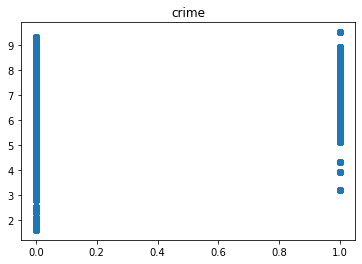

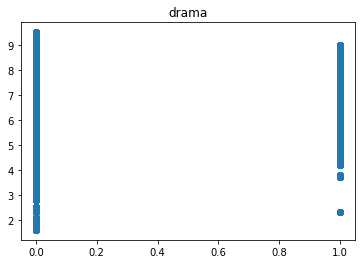

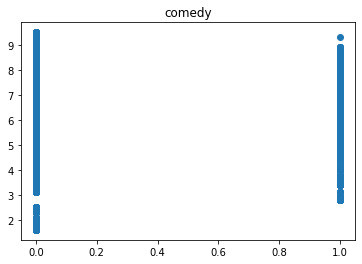

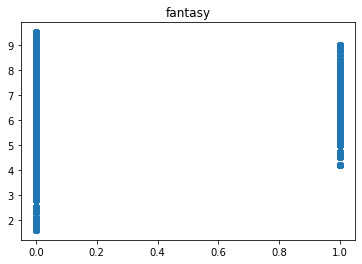

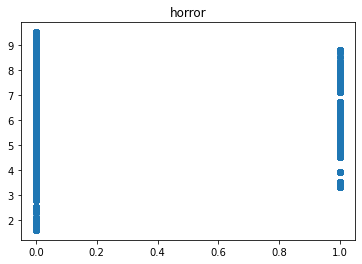

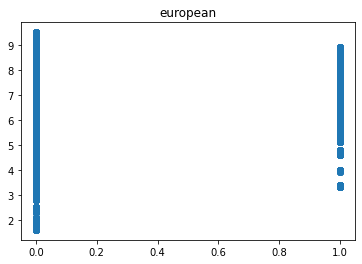

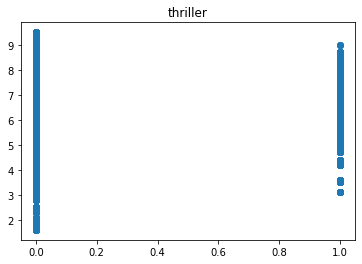

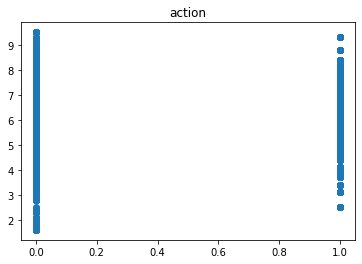

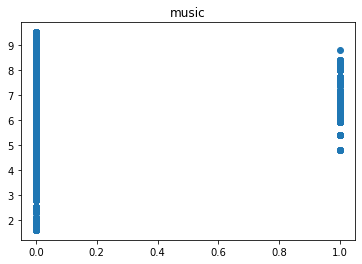

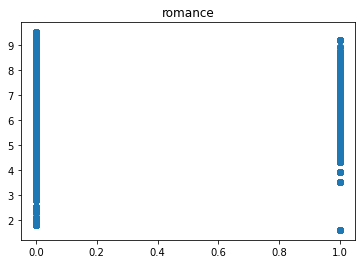

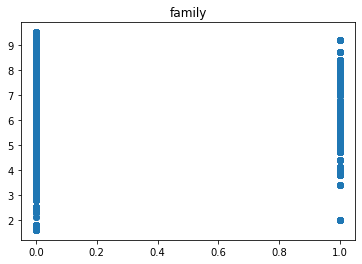

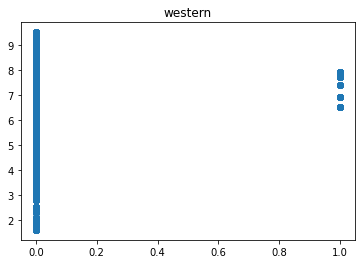

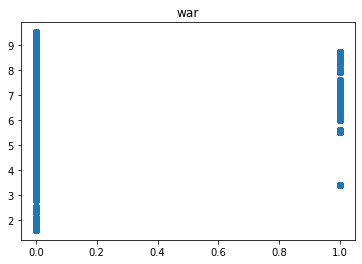

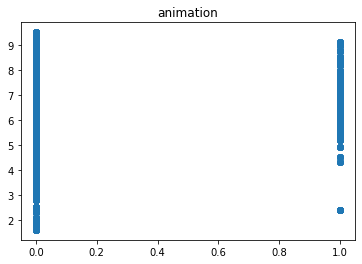

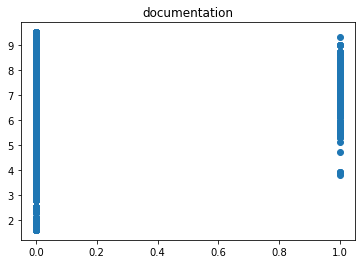

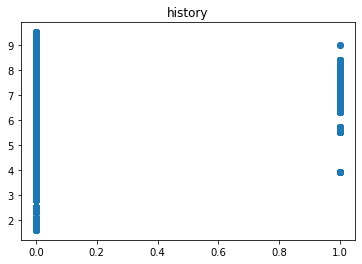

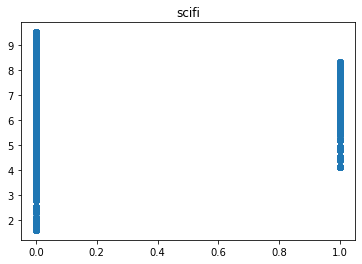

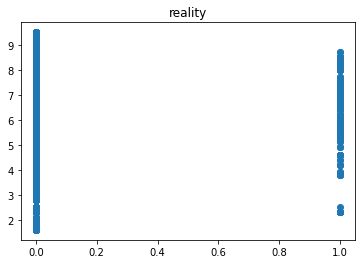

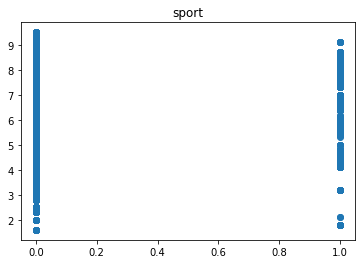

In [32]:
for genre in ['crime', 'drama', 'comedy', 'fantasy', 'horror', 'european', 'thriller',
       'action', 'music', 'romance', 'family', 'western', 'war', 'animation',
       'documentation', 'history', 'scifi', 'reality', 'sport']:

    plt.scatter(data[genre],data['imdb_score'])
    plt.title(genre)
    plt.show()

In [33]:
def genre_correlation(x,y):
    
    predict_set = []

    for i,ii in zip(x,y):
        if i == 1:
            predict_set.append(ii)

    return predict_set

In [34]:
correlation = {}
for genre in ['crime', 'drama', 'comedy', 'fantasy', 'horror', 'european', 'thriller',
       'action', 'music', 'romance', 'family', 'western', 'war', 'animation',
       'documentation', 'history', 'scifi', 'reality', 'sport']:
    print(genre,'\n')
    print("mean = ",np.mean(genre_correlation(data[genre],data['imdb_score'])))
    print("median = ",np.median(genre_correlation(data[genre],data['imdb_score'])))
    print("25th percentile = ",np.quantile(genre_correlation(data[genre],data['imdb_score']),0.25))
    print("75th percentile = ",np.quantile(genre_correlation(data[genre],data['imdb_score']),0.75))
    print("\n\n\n")
    correlation[genre] = np.median(genre_correlation(data[genre],data['imdb_score']))

crime 

mean =  6.6828772189349115
median =  6.8
25th percentile =  6.1
75th percentile =  7.4




drama 

mean =  6.731596493394246
median =  6.8
25th percentile =  6.1
75th percentile =  7.5




comedy 

mean =  6.321510164569216
median =  6.4
25th percentile =  5.6
75th percentile =  7.1




fantasy 

mean =  6.6380011968880925
median =  6.5
25th percentile =  6.0
75th percentile =  7.2




horror 

mean =  6.162813688212927
median =  6.2
25th percentile =  5.1
75th percentile =  7.3




european 

mean =  6.8381871035940796
median =  6.9
25th percentile =  6.4
75th percentile =  7.3




thriller 

mean =  6.65664757310823
median =  6.6
25th percentile =  6.0
75th percentile =  7.5




action 

mean =  6.4323959827833574
median =  6.6
25th percentile =  5.7
75th percentile =  7.3




music 

mean =  6.929362880886426
median =  6.8
25th percentile =  6.3
75th percentile =  7.6




romance 

mean =  6.619020172910663
median =  6.7
25th percentile =  5.8
75th percentile =  7.4




fami

In [35]:
print("Median sorted genre\n")

for i in sorted(correlation,key=correlation.get,reverse=True):
    print(i,"   : ",correlation[i])

Median sorted genre

war    :  7.2
history    :  7.2
documentation    :  7.0
sport    :  7.0
european    :  6.9
western    :  6.9
crime    :  6.8
drama    :  6.8
music    :  6.8
romance    :  6.7
reality    :  6.7
thriller    :  6.6
action    :  6.6
animation    :  6.6
fantasy    :  6.5
scifi    :  6.5
comedy    :  6.4
horror    :  6.2
family    :  6.0


<font size = '4'>
    
<br>
    
War , History, Documentation, Sports Genre are rated much higher than other genres. 

on the other hand, surprisingly family,horror and comedy movies are not so rated higher

this seems counterintuitive as family, horror and comedy are generally more popular genres.

additionally WAR and HISTORY has median score of 7.2 and their 25th quantile values are also around 6.8 which
is median score for most genres. </font>

In [36]:
countries_made = {}
for country in production_.columns:
    for i in data[country]:
        if i == 1:
            if country in countries_made.keys():
                countries_made[country] = countries_made[country]+1
                
            else:
                countries_made[country] = 1


In [37]:
countries_made = dict(sorted(countries_made.items(),key=lambda item: item[1],reverse=True))
n = len(data)
for country in countries_made:
    print(country,' : ',countries_made[country],' : ',round((countries_made[country]/n)*100,2),"%")
        


US  :  24785  :  55.59 %
IN  :  2817  :  6.32 %
GB  :  2760  :  6.19 %
JP  :  2531  :  5.68 %
KR  :  1417  :  3.18 %
CA  :  1107  :  2.48 %
ES  :  1012  :  2.27 %
DE  :  896  :  2.01 %
FR  :  818  :  1.83 %
CN  :  693  :  1.55 %
TR  :  670  :  1.5 %
AU  :  589  :  1.32 %
MX  :  414  :  0.93 %
IT  :  356  :  0.8 %
HK  :  282  :  0.63 %
BR  :  258  :  0.58 %
BE  :  229  :  0.51 %
TW  :  229  :  0.51 %
AE  :  198  :  0.44 %
AR  :  164  :  0.37 %
SE  :  163  :  0.37 %
CO  :  162  :  0.36 %
PL  :  155  :  0.35 %
PH  :  152  :  0.34 %
TH  :  150  :  0.34 %
DK  :  111  :  0.25 %
NL  :  109  :  0.24 %
CH  :  95  :  0.21 %
RU  :  83  :  0.19 %
IS  :  74  :  0.17 %
XX  :  74  :  0.17 %
IR  :  74  :  0.17 %
NG  :  67  :  0.15 %
ZA  :  67  :  0.15 %
IE  :  58  :  0.13 %
IL  :  58  :  0.13 %
NZ  :  57  :  0.13 %
NO  :  48  :  0.11 %
ID  :  47  :  0.11 %
CZ  :  44  :  0.1 %
BG  :  41  :  0.09 %
LB  :  37  :  0.08 %
EG  :  33  :  0.07 %
FI  :  28  :  0.06 %
LU  :  20  :  0.04 %
RO  :  17  :  0.04 %
C

<font size = '4'>
netflix shows are predominantly made in US, around 55%, so much so that the second most made shows are 6 percent in India. </font>

In [38]:
correlation = {}
for genre in countries_made.keys():
    print(genre,'\n')
    print("mean = ",np.mean(genre_correlation(data[genre],data['imdb_score'])))
    print("median = ",np.median(genre_correlation(data[genre],data['imdb_score'])))
    print("25th percentile = ",np.quantile(genre_correlation(data[genre],data['imdb_score']),0.25))
    print("75th percentile = ",np.quantile(genre_correlation(data[genre],data['imdb_score']),0.75))
    print("\n\n\n")
    correlation[genre] = np.median(genre_correlation(data[genre],data['imdb_score']))

US 

mean =  6.497712326003632
median =  6.6
25th percentile =  5.8
75th percentile =  7.3




IN 

mean =  6.829499467518638
median =  7.0
25th percentile =  6.1
75th percentile =  7.6




GB 

mean =  6.926557971014493
median =  7.0
25th percentile =  6.3
75th percentile =  7.7




JP 

mean =  7.047056499407348
median =  7.1
25th percentile =  6.5
75th percentile =  7.7




KR 

mean =  7.525335215243472
median =  7.7
25th percentile =  7.0
75th percentile =  8.2




CA 

mean =  6.419421860885275
median =  6.4
25th percentile =  5.8
75th percentile =  7.0




ES 

mean =  6.703260869565218
median =  6.8
25th percentile =  6.2
75th percentile =  7.4




DE 

mean =  6.791629464285713
median =  6.7
25th percentile =  6.4
75th percentile =  7.3




FR 

mean =  6.571515892420538
median =  6.5
25th percentile =  5.8
75th percentile =  7.4




CN 

mean =  7.095382395382396
median =  7.3
25th percentile =  6.1
75th percentile =  7.9




TR 

mean =  6.254179104477612
median =  6.1
25th 

In [39]:
print("Median sorted genre\n")

for i in sorted(correlation,key=correlation.get,reverse=True):
    print(i,"   : ",correlation[i])

Median sorted genre

CL    :  8.5
KR    :  7.7
NO    :  7.7
LB    :  7.6
LU    :  7.5
CN    :  7.3
AR    :  7.3
IL    :  7.3
FI    :  7.3
AT    :  7.3
JP    :  7.1
IT    :  7.1
TW    :  7.1
DK    :  7.1
XX    :  7.1
IE    :  7.1
IN    :  7.0
GB    :  7.0
CZ    :  7.0
NL    :  6.9
NZ    :  6.9
ID    :  6.9
MX    :  6.85
ES    :  6.8
AE    :  6.8
SE    :  6.8
IS    :  6.8
BG    :  6.8
SG    :  6.8
DE    :  6.7
RU    :  6.7
IR    :  6.7
US    :  6.6
AU    :  6.6
CO    :  6.6
FR    :  6.5
PH    :  6.5
CA    :  6.4
BR    :  6.4
PL    :  6.4
BE    :  6.3
TH    :  6.2
EG    :  6.2
TR    :  6.1
CH    :  6.1
ZA    :  6.1
HK    :  6.0
PE    :  5.4
SA    :  5.3
RO    :  4.8
NG    :  4.4


In [40]:
data.reset_index(inplace=True)

In [41]:
n=0
for i in data.index:
    if i!=n:
        print(n)
        n+=1
    n+=1

In [42]:
temp = {}
c =0
for country in correlation.keys():
    temp[country] = {}
    for genre in genres_.columns:
        n=0
        for i in data[genre]:
            if i == 1 and data[country].loc[n] == 1:
                if genre in temp[country].keys():
                    temp[country][genre] = temp[country][genre] +1
                else:
                    temp[country][genre] = 1
            n+=1
    c+=1
#     print(c/len(correlation.keys()))
          

In [43]:
print('us :',temp['US'],'\n\n','cl :',temp['CL'])

us : {'crime': 1631, 'drama': 4778, 'comedy': 3146, 'fantasy': 767, 'horror': 957, 'european': 1317, 'thriller': 1660, 'action': 1994, 'music': 519, 'romance': 1675, 'family': 1243, 'western': 111, 'war': 992, 'animation': 499, 'documentation': 1221, 'history': 522, 'scifi': 798, 'reality': 235, 'sport': 718} 

 cl : {'drama': 13}


<font size="4">
    
<br>
even though most movies are made in US it's avarage imdb rating is also avarage among all country locations.
<br> it can be explained by the fact that as most shows are made in US, most genres are also covered by in US.
    
<br> for example as we can clearly see above the best raking location is CL (Chile), but it has only 13 shows on Neflix and those too, are in only one genre i.e. Drama</font>

In [44]:
encoder = LabelEncoder()

In [45]:
for i in ['role','type','age_certification']:
    data[i] = encoder.fit_transform(data[i])

In [46]:
data.drop(columns='name',inplace=True)

In [47]:
data.head()

,index,role,type,release_year,age_certification,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,...,XX,AE,ZA,ID,IL,FI,RO,PL,IR,LU
0,0,0,0,1976,4,113,0.0,8.3,795222.0,27.612,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1976,4,113,0.0,8.3,795222.0,27.612,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,1976,4,113,0.0,8.3,795222.0,27.612,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,1976,4,113,0.0,8.3,795222.0,27.612,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,1976,4,113,0.0,8.3,795222.0,27.612,...,0,0,0,0,0,0,0,0,0,0


In [48]:
data = data.astype(np.float64)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44588 entries, 0 to 44587
Data columns (total 83 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              44588 non-null  float64
 1   role               44588 non-null  float64
 2   type               44588 non-null  float64
 3   release_year       44588 non-null  float64
 4   age_certification  44588 non-null  float64
 5   runtime            44588 non-null  float64
 6   seasons            44588 non-null  float64
 7   imdb_score         44588 non-null  float64
 8   imdb_votes         44588 non-null  float64
 9   tmdb_popularity    44588 non-null  float64
 10  tmdb_score         44588 non-null  float64
 11  crime              44588 non-null  float64
 12  drama              44588 non-null  float64
 13  comedy             44588 non-null  float64
 14  fantasy            44588 non-null  float64
 15  horror             44588 non-null  float64
 16  european           445

In [50]:
data.corr()

,index,role,type,release_year,age_certification,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,...,XX,AE,ZA,ID,IL,FI,RO,PL,IR,LU
index,1.000000,0.039761,0.248921,0.786787,0.219600,-0.250386,-0.028078,-0.136664,-0.335161,0.097919,...,-0.014811,-0.030483,0.051625,0.004716,0.012604,-0.007408,0.021965,0.048455,0.000760,0.028538
role,0.039761,1.000000,-0.003333,0.026194,-0.020866,-0.016742,-0.028854,-0.014187,-0.047057,-0.024073,...,-0.002950,0.001343,-0.002257,0.000180,0.008105,-0.005212,0.001703,-0.002723,-0.005714,0.006223
type,0.248921,-0.003333,1.000000,0.231608,0.820168,-0.800233,0.620254,0.306769,-0.206018,0.060991,...,-0.016375,-0.031499,0.026276,0.003081,0.045777,0.042682,-0.011470,0.025523,-0.023946,0.006963
release_year,0.786787,0.026194,0.231608,1.000000,0.208140,-0.239154,0.007145,-0.114486,-0.292463,0.069521,...,-0.001254,-0.005254,0.030394,0.016567,0.015107,0.008792,0.012315,0.038666,0.020795,0.016422
age_certification,0.219600,-0.020866,0.820168,0.208140,1.000000,-0.651921,0.527981,0.267697,-0.110497,0.069786,...,-0.028941,-0.033677,0.026706,0.003696,0.037601,0.041922,-0.000887,0.028068,-0.001851,-0.000962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FI,-0.007408,-0.005212,0.042682,0.008792,0.041922,-0.031604,0.040653,0.015509,-0.010740,-0.006932,...,-0.001022,-0.001674,-0.000972,-0.000814,-0.000905,1.000000,-0.000490,-0.001481,-0.001022,-0.000531
RO,0.021965,0.001703,-0.011470,0.012315,-0.000887,0.007382,-0.007114,-0.033253,-0.008335,0.002323,...,-0.000796,-0.001304,-0.000758,-0.000634,-0.000705,-0.000490,1.000000,-0.001153,-0.000796,-0.000414
PL,0.048455,-0.002723,0.025523,0.038666,0.028068,-0.013094,0.001623,-0.026616,-0.027270,-0.009796,...,-0.002408,-0.003945,-0.002291,-0.001919,-0.002132,-0.001481,-0.001153,1.000000,-0.002408,-0.001251
IR,0.000760,-0.005714,-0.023946,0.020795,-0.001851,0.029284,-0.014852,0.002510,-0.017777,-0.015641,...,-0.001662,-0.002723,-0.001582,-0.001324,-0.001471,-0.001022,-0.000796,-0.002408,1.000000,-0.000864


In [51]:
def correlation_detection(data, method='pearson', threshold=0.65):
    '''
    method : {'pearson', 'kendall', 'spearman'} or callable
    Method of correlation:

    * pearson : standard correlation coefficient
    * kendall : Kendall Tau correlation coefficient
    * spearman : Spearman rank correlation
    * callable: callable with input two 1d ndarrays
        and returning a float. Note that the returned matrix from corr
        will have 1 along the diagonals and will be symmetric
        regardless of the callable's behavior.
    
    '''
    data_corr=data.corr(method)
    corr_dict={}
    for feature in data_corr.columns:
        corr_row_list=[]
        for row_feature in data_corr.columns:
            if ( (data_corr.loc[row_feature,feature] >= threshold or data_corr.loc[row_feature,feature] <= -threshold )
                
                and
                
                data_corr.loc[row_feature,feature] != 1
               ):
                corr_row_list.append([row_feature, data_corr.loc[row_feature,feature]])
        
        if len(corr_row_list) != 0:
            corr_dict[feature]=corr_row_list
    
    order = {}
    return_dict={}
    
    for key in corr_dict:
        order[len(corr_dict[key])]=key
        
    for key in sorted(order, reverse=True):
        return_dict[order[key]]=corr_dict[order[key]]
        
    return return_dict

In [52]:
correlation_detection(data,method='kendall')

{'seasons': [['type', 0.9487983205970691],
  ['age_certification', 0.6676400435184183]],
 'release_year': [['index', 0.8912844778915694]]}

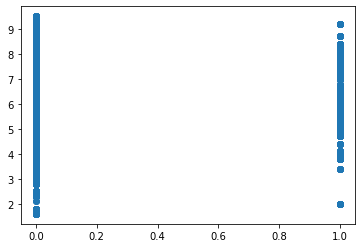

In [53]:
plt.scatter(data['family'],data['imdb_score'])

<font size = '4'>
<br>
    the algorythm works the best as a Multi-class classification problem, so we convert the output label from continuous to discrete variable.
    
</font>

In [54]:
# imdb_hit_flop = []
# avg_score = np.median(data['imdb_score'])*(1-0.05)
# for i in data['imdb_score']:
#     if i >= avg_score:
#         imdb_hit_flop.append(1)
#     else:
#         imdb_hit_flop.append(0)


imdb_hit_flop = []
avg_score = np.median(data['imdb_score'])
for i in data['imdb_score']:
    if i < avg_score*(1-0.2):
        imdb_hit_flop.append(0)
    elif i > avg_score*(1-0.2) and i < avg_score*(1-0.07):
        imdb_hit_flop.append(0.25)
    elif i > avg_score*(1-0.07) and i < avg_score*(1+0.07):
        imdb_hit_flop.append(0.5)
    elif i > avg_score*(1+0.07) and i < avg_score*(1+0.2):
        imdb_hit_flop.append(0.75)
    elif i > avg_score*(1+0.2):
        imdb_hit_flop.append(1)
        
print('flop : ',avg_score*(1-0.2),
   '\nbelow avarage : ',avg_score*(1-0.2),'-',avg_score*(1-0.07),
   '\navarage : ',avg_score*(1-0.07),'-',round(avg_score*(1+0.07),3),
   '\nhit : ',round(avg_score*(1+0.07),3),'-',avg_score*(1+0.2),
    '\nsuper-hit : ',avg_score*(1+0.2),
     )

flop :  5.36 
below avarage :  5.36 - 6.231 
avarage :  6.231 - 7.169 
hit :  7.169 - 8.04 
super-hit :  8.04


In [55]:
n = 0
for i in imdb_hit_flop:
    if i==0:
        n+=1
        
n / len(imdb_hit_flop)

0.10684489100206333

In [56]:
np.quantile(data['imdb_score'],0.10)

5.3

In [57]:
data['imdb_hit_flop'] = imdb_hit_flop

In [58]:
data.head()

,index,role,type,release_year,age_certification,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,...,AE,ZA,ID,IL,FI,RO,PL,IR,LU,imdb_hit_flop
0,0.0,0.0,0.0,1976.0,4.0,113.0,0.0,8.3,795222.0,27.612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1976.0,4.0,113.0,0.0,8.3,795222.0,27.612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,0.0,0.0,1976.0,4.0,113.0,0.0,8.3,795222.0,27.612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.0,0.0,0.0,1976.0,4.0,113.0,0.0,8.3,795222.0,27.612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4.0,0.0,0.0,1976.0,4.0,113.0,0.0,8.3,795222.0,27.612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


(array([ 4764.,     0.,  9921.,     0.,     0., 14492.,     0., 11903.,
            0.,  3508.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

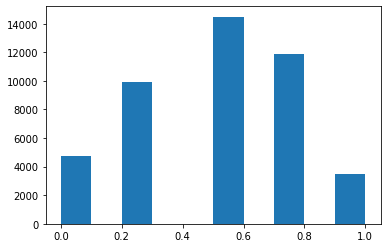

In [59]:
plt.hist(data['imdb_hit_flop'])

### we do get normal distribution for the label

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [61]:
# 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'

c = ['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score','imdb_hit_flop']

In [62]:
X = [i for i in data.columns if i not in c]
X = data[X]

In [63]:
encoder = LabelEncoder()
y_transformed = encoder.fit_transform(data['imdb_hit_flop'])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2)

In [65]:
X_train.columns

Index(['index', 'role', 'type', 'release_year', 'age_certification', 'runtime',
       'seasons', 'crime', 'drama', 'comedy', 'fantasy', 'horror', 'european',
       'thriller', 'action', 'music', 'romance', 'family', 'western', 'war',
       'animation', 'documentation', 'history', 'scifi', 'reality', 'sport',
       'US', 'GB', 'JP', 'EG', 'DE', 'IN', 'LB', 'FR', 'CA', 'IT', 'HK', 'AR',
       'PE', 'BR', 'IE', 'ES', 'MX', 'AU', 'CO', 'BE', 'NO', 'PS', 'TR', 'CZ',
       'IS', 'DK', 'NZ', 'CN', 'KR', 'BG', 'RU', 'SG', 'TW', 'MY', 'CH', 'CL',
       'NG', 'SA', 'AT', 'NL', 'SE', 'PH', 'TH', 'XX', 'AE', 'ZA', 'ID', 'IL',
       'FI', 'RO', 'PL', 'IR', 'LU'],
      dtype='object')

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

In [67]:
# regression = LinearRegression()
k_nearest = KNeighborsClassifier()

In [68]:
# regression.fit(X_train,y_train)
k_nearest.fit(X_train,y_train)

KNeighborsClassifier()

In [69]:
# regression.score(X_test,y_test)
k_nearest.score(X_test,y_test)

0.9822830230993497